In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df1 = pd.read_csv("A1A2Table1.csv")

In [4]:
df1.columns
# '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距'

Index(['Keyid', 'filename', '事故年月', '總編號', '處理單位代碼', '處理編號', '日期', '時', '分',
       '秒', '縣市', '市區鄉鎮', '村里', '鄰', '街路', '段1', '交叉路', '段2', '巷', '弄', '號前',
       '公尺處', '側', '附近', '地點', '公路', '公里', '公尺', '車道方向', '車道位置', '鐵路線', '鐵路公里',
       '鐵路公尺', '平交道', '死亡', '受傷', '2-30日', '天候', '光線', '道路類別', '速限', '道路型態',
       '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距', '號誌種類', '號誌動作', '分向設施',
       '分道設施-快車道間', '分道設施-快慢車道間', '分道設施-路面邊線', '事故類型及型態', '主要肇事因素', 'NewCity',
       'CASE_NO', '單位', '單位名稱', '權責縣市_Keyid'],
      dtype='object')

In [5]:
con1 = df1.日期 >='2017/1/1'
con2 = df1.公路 == '國道五號'
con3 = df1.公路 == '國道5號'
df = df1[con1 & (con2|con3)]

df.loc[df.事故位置==7, '事故位置'] = '快車道'
df.loc[df.事故位置==14, '事故位置'] = '加速車道'
df.loc[df.事故位置==16, '事故位置'] = '直線匝道'
df.loc[df.事故位置==17, '事故位置'] = '環道匝道'
df.loc[df.事故位置==22, '事故位置'] = '其他'

df.loc[df.道路型態==14, '道路型態'] = '直路'
df.loc[df.道路型態==6, '道路型態'] = '隧道'
df.loc[df.道路型態==10, '道路型態'] = '高架道路'
df.loc[df.道路型態==15, '道路型態'] = '其他'
df.loc[df.道路型態==11, '道路型態'] = '彎曲路及附近'
df.loc[df.道路型態==12, '道路型態'] = '坡路'

df.loc[df.路面鋪裝==1, '路面鋪裝'] = '柏油'
df.loc[df.路面鋪裝==2, '路面鋪裝'] = '水泥'

df.loc[df.路面狀態==4, '路面狀態'] = '濕潤'
df.loc[df.路面狀態==5, '路面狀態'] = '乾燥'

df.loc[df.路面缺陷==2, '路面缺陷'] = '突出'
df.loc[df.路面缺陷==4, '路面缺陷'] = '無缺陷'

df.loc[df.障礙物==1, '障礙物'] = '道路施工'
df.loc[df.障礙物==4, '障礙物'] = '其他障礙物'
df.loc[df.障礙物==5, '障礙物'] = '無障礙物'

df.loc[df.視距==1, '視距'] = '不良（彎道）'
df.loc[df.視距==6, '視距'] = '不良（其他）'
df.loc[df.視距==7, '視距'] = '良好'

df =df[['Keyid','總編號','日期', '時','公路','公里', '公尺', '車道方向', '車道位置', '速限','道路型態',
    '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距','CASE_NO']]

df.to_csv('filtered.csv', encoding='big5')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
df_state = df.groupby(['車道方向', '車道位置','道路型態', '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距']).count()
df_state

Keyid  總編號  日期  時  公路  公里  \
車道方向 車道位置 道路型態   事故位置 路面鋪裝 路面狀態 路面缺陷 障礙物   視距                                  
北    交流道  彎曲路及附近 環道匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          直路     直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          高架道路   快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
     內側   彎曲路及附近 環道匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
                           濕潤   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好          2    2   2  2   2   2   
     外側   坡路     直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
                           濕潤   無缺陷  無障礙物  不良（其他）      1    1   1  1   1   1   
                                           良好          4    4   4  4   4   4   
                 直線匝道 柏油   乾燥   無缺陷  其他障礙物 良好          1    1   1  1   1   1   
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
                                     道路施工  良好          1    1   1  1   1   1   
     路肩   直路     環道匝道 柏油   濕潤   無缺陷  無障礙物  良好          1    1   1  1   1   1   
南    交流道  其他     其他   水泥   乾燥   突出   其他障礙物 良好          1    1   1  1   1   1   
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          彎曲路及附近 環道匝道 柏油   濕潤   無缺陷  無障礙物  不良（其他）      1    1   1  1   1   1   
          直路     加速車道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                           濕潤   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          高架道路   環道匝道 柏油   濕潤   無缺陷  無障礙物  不良（彎道）      1    1   1  1   1   1   
     內側   直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                           濕潤   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                                     道路施工  良好          1    1   1  1   1   1   
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
     外側   直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好          3    3   3  3   3   3   
                                     道路施工  良好          1    1   1  1   1   1   
                           濕潤   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          高架道路   快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
     服務區  其他     其他   水泥   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   

                                                   公尺  速限  CASE_NO  
車道方向 車道位置 道路型態   事故位置 路面鋪裝 路面狀態 路面缺陷 障礙物   視距                       
北    交流道  彎曲路及附近 環道匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1        1  
          直路     直線匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1        1  
          高架道路   快車道  柏油   乾燥   無缺陷  無障礙物  良好       1   1        1  
     內側   彎曲路及附近 環道匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1        1  
          直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好       1   1        1  
                           濕潤   無缺陷  無障礙物  良好       2   2        2  
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1        1  
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好       2   2        2  
     外側   坡路     直線匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1        1  
          直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好       1   1        1  
                           濕潤   無缺陷  無障礙物  不良（其他）   1   1        1  
                                           良好       4   4        4  
                 直線匝道 柏油   乾燥   無缺陷  其他障礙物 良好       1   1        1  
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好       1   1        1  
                                     道路施工  良好       1   1        1

In [6]:
df_state = df.groupby(['道路型態', '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物']).count()
df_state.to_csv('道路狀況組合.csv')

In [7]:
list1 = []

In [8]:

for i in range(1,13):
    list1.append(df[df['日期']<='2017/'+str(i)+'/31'].日期.count())

In [9]:
arr1 = np.array(list1)

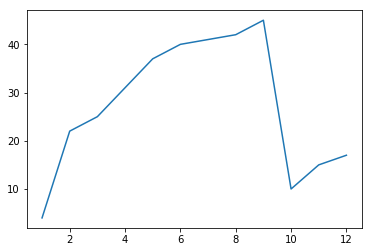

In [10]:
x = np.linspace(1, 12, 12)
plt.plot(x, arr1)

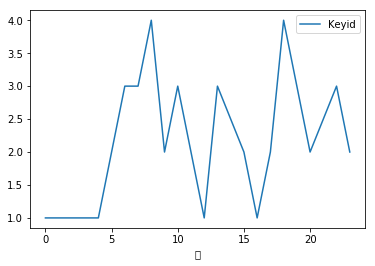

In [25]:
df_hour = df[['時', 'Keyid']]
df_hour.groupby(['時']).count().plot()